In [7]:
import pandas as pd
import numpy as np
from matplotlib.patches import Ellipse
from matplotlib import transforms

import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d



- Definition of Gaussian Mixture Model: $P(x) = \sum^K_{k=1}p(x|z_k=1)p(z_k=1) = \sum^K_{k=1}\frac{a_k}{\sqrt{2πσ^2_k}}\exp(-\frac{x-\mu_k}{2σ^2_k})$, where $p(z_k=1) = \alpha_k$, and $\frac{a_k}{\sqrt{2πσ^2_k}}\exp(-\frac{x-\mu_k}{2σ^2_k}) = \alpha_k \cdot N(x_n; \mu_k, \sigma_k)$

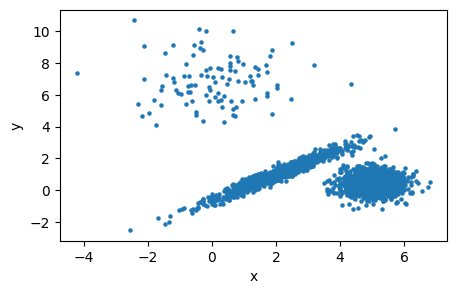

In [5]:
# Plot the reduced latent space
plt.figure(figsize=(5, 3))
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
from scipy.stats import multivariate_normal


def initialize(X, K):
  # Initialize K Gaussian distributions and their mixture coefficients
  N, dim = X.shape
  mu = np.random.rand(K, dim)
  cov = np.array([np.identity(dim) for _ in range(K)])
  alpha = np.ones(K) / K
  return mu, cov, alpha

def EM_GMM(X, K, n_iterations):
  # Initialize K Gaussian distributions and their mixture coefficients
  N = X.shape[0]
  mu, cov, alpha = initialize(X, K)
  # np.random.dirichlet(np.ones(K))

  for iter in range(n_iterations):
    # # Expectation Step:
    r = np.zeros((N, K))
    for k in range(K):
      # implement normal pdf?
      r[:,k] = alpha[k] * multivariate_normal.pdf(X, mu[k], cov[k])
    r /= r.sum(axis=1, keepdims=True)

    # # Maximization Step
    N_k = r.sum(axis=0)

    # 1. Mixture Coefficient: updating alphas
    alpha = N_k / N

    # 2. Means:
    mu = (r.T @ X) / N_k[:, np.newaxis]

    # 3. Covariances:
    for k in range(len(N_k)):
      diff = X - mu[k]
      #cov[k] = ((r[:, k] * diff.T) @ diff) / N_k[k]
      cov[k] = np.dot(r[:, k] * diff.T, diff) / N_k[k]
  return mu, cov, alpha


In [8]:
def draw_conf2D(mu,Sigma,ax,n_std=2,**kwargs):
  for i in range(mu.shape[0]):
    pearson = Sigma[i,0, 1]/np.sqrt(Sigma[i,0, 0] * Sigma[i,1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,**kwargs)
    scale_x = np.sqrt(Sigma[i,0, 0]) * n_std
    mean_x = mu[i,0]
    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(Sigma[i,1, 1]) * n_std
    mean_y = mu[i,1]
    transf = transforms.Affine2D() \
       .rotate_deg(45) \
       .scale(scale_x, scale_y) \
       .translate(mean_x, mean_y)
    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)
  return

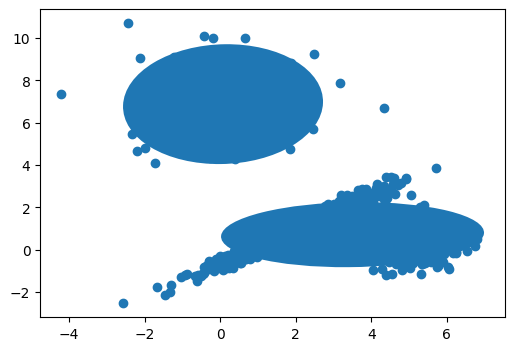

In [9]:
mu, cov, alpha = EM_GMM(X, 2, 100)

fig,ax=plt.subplots(1,1,figsize=(6,4))
plt.scatter(X[:,0], X[:,1])
draw_conf2D(mu,cov,ax)